In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

HCP_DIR = "./hcp"
# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasser parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in seconds

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated twice in each subject
N_RUNS = 2
regions = np.load(f"{HCP_DIR}/regions.npy").T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    hemi=['Right']*int(N_PARCELS/2) + ['Left']*int(N_PARCELS/2),
)

In [8]:
betasWin = np.load('betasRun2Loss.npy')
betasLoss = np.load('betasRun2Win.npy')


In [9]:
NumberofSubjects = 339
one = np.ones(NumberofSubjects)
zero = np.zeros(NumberofSubjects)

In [10]:
import math
subjectsTrainforWins = math.floor(NumberofSubjects*0.8) 
subjectsTrainforLoss = subjectsTrainforWins
X_trainWins = betasWin[:subjectsTrainforWins]
y_trainWins = one[:subjectsTrainforWins]

X_testWins = betasWin[subjectsTrainforWins:]
y_testWins = one[subjectsTrainforWins:]


X_trainLoss = betasLoss[:subjectsTrainforLoss]
y_trainLoss = zero[:subjectsTrainforLoss]

X_testLoss = betasLoss[subjectsTrainforLoss:]
y_testLoss = zero[subjectsTrainforLoss:]


X_train = np.concatenate((X_trainWins,X_trainLoss))

y_train = np.concatenate((y_trainWins,y_trainLoss))

X_test = np.concatenate((X_testWins,X_testLoss))
y_test = np.concatenate((y_testWins,y_testLoss))

print(f'X_train shape is {X_train.shape}\nX_test shape is {X_test.shape} \ny_train shape is {y_train.shape} \ny_test shape is {y_test.shape}')

X_train shape is (542, 360)
X_test shape is (136, 360) 
y_train shape is (542,) 
y_test shape is (136,)


In [11]:
scaler_X = StandardScaler()
f_transformer = scaler_X.fit(X_train)

X_train = f_transformer.transform(X_train)
X_test = f_transformer.transform(X_test)

In [27]:
logisticRegr = LogisticRegression(max_iter = 2000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [28]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.7720588235294118


In [33]:
from sklearn.metrics import confusion_matrix

sns.heatmap(ConfusionMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: name 'ConfusionMatrix' is not defined

<BarContainer object of 10 artists>

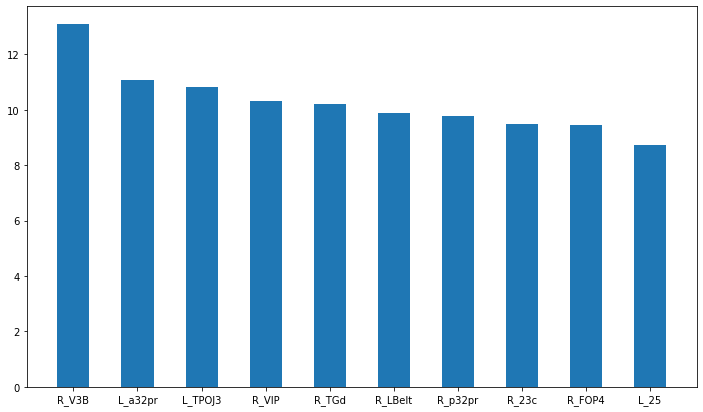

In [29]:
weights = np.ravel(logisticRegr.coef_)
weights = weights*10
regionsWights = regions[0]

indices = (-weights).argsort()[:10]
plt.figure(figsize = (12,7))

plt.bar(regionsWights[indices] , weights[indices], width =0.5)



In [15]:
regions[1][indices]

array(['Visual2', 'Cingulo-Oper', 'Dorsal-atten', 'Visual2',
       'Posterior-Mu', 'Auditory', 'Cingulo-Oper', 'Cingulo-Oper',
       'Cingulo-Oper', 'Posterior-Mu'], dtype='<U12')

In [31]:
np.save('weightsLogisticRegressionRun2.npy' , weights)